<a href="https://colab.research.google.com/github/Subarna-Liza/ML/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/_train - train.csv')
df


FileNotFoundError: ignored

# Data visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


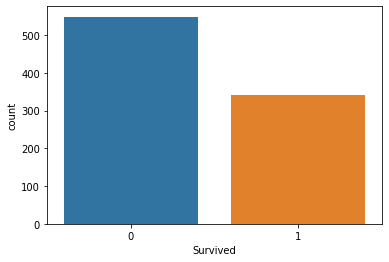

In [ ]:
sns.countplot('Survived',data=df)

In [ ]:
df.iloc[:,1:12].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Correlation

# Heatmap

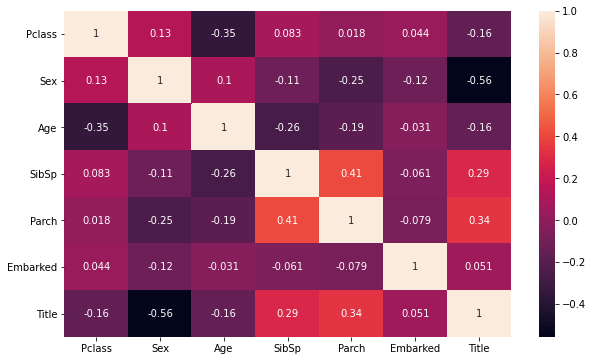

In [ ]:
plt.figure(figsize=(10,6
                    
                    ))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True)

# Preprocessing of Name column

In [ ]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train_test_data=[df]
for dataset in train_test_data:
  dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,Ticket,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [ ]:
df.drop('Name',axis=1,inplace=True)


In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,Ticket,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Mme           1
Countess      1
Lady          1
Ms            1
Don           1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

# Now mapping on Title column

In [ ]:
Title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Mme":3,"Countess":3,"Ms":3,"Capt":3,"Jonkheer":3,"Sir":3,"Lady":3,"Don":3,}

In [ ]:
train_test_data=[df]
for dataset in train_test_data:
  dataset['Title']=dataset['Title'].map(Title_mapping)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,Ticket,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
df['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

# Label encoding of sex columns

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['Sex']=le.fit_transform(df['Sex'])


In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,Ticket,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

## Mapping of Embarked columns

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
Embarked_mapping={"S":0,"C":1,"Q":2}

In [ ]:
train_test_data=[df]
for dataset in train_test_data:
  dataset['Embarked']=dataset['Embarked'].map(Embarked_mapping)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,Ticket,7.2500,NaN,0.0,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,0.0,3
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,0.0,1
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0,1
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,1.0,0


In [ ]:
df['Embarked']=df['Embarked'].round(0)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,Ticket,7.2500,NaN,0.0,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,0.0,3
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,0.0,1
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0,1
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,1.0,0


# Missing values handling

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
df['Age'].fillna(df.groupby('Title')['Age'].transform("median"),inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [ ]:
missing=df.Embarked.mean()
df.Embarked=df.Embarked.fillna(missing)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

# Dropping the unnessesary feature

In [ ]:
feature_drop=['PassengerId','Fare','Cabin','Ticket']

In [ ]:
df=df.drop(feature_drop,axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,1,22.0,1,0,0.0,0
1,1,1,0,38.0,1,0,1.0,2
2,1,3,0,26.0,0,0,0.0,1
3,1,1,0,35.0,1,0,0.0,2
4,0,3,1,35.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.0,3
887,1,1,0,19.0,0,0,0.0,1
888,0,3,0,21.0,1,2,0.0,1
889,1,1,1,26.0,0,0,1.0,0


# Algorithms Selection

In [ ]:
y=df.iloc[:,:1]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
x=df.drop(['Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,1,22.0,1,0,0.0,0
1,1,0,38.0,1,0,1.0,2
2,3,0,26.0,0,0,0.0,1
3,1,0,35.0,1,0,0.0,2
4,3,1,35.0,0,0,0.0,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,0.0,3
887,1,0,19.0,0,0,0.0,1
888,3,0,21.0,1,2,0.0,1
889,1,1,26.0,0,0,1.0,0


# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg_score=reg.score(xtest,ytest)

In [ ]:
reg_score

0.35773183726414015

# Decesion tree Algorithm

In [ ]:
from sklearn import  tree


In [ ]:
Classify=tree.DecisionTreeClassifier()


In [ ]:
model=Classify.fit(xtrain,ytrain)

In [ ]:
DT_score=model.score(xtest,ytest)

In [ ]:
DT_score


0.7761194029850746

# Support Vactor Machine Algrithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC()

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVM_score=model.score(xtest,ytest)

In [ ]:
SVM_score

0.6194029850746269

# Random forest Algorthm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RF_score=rf.score(xtest,ytest)

In [ ]:
RF_score

0.7873134328358209

# KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn import metrics

In [ ]:
df.shape

(891, 8)

In [ ]:
k=29

In [ ]:
neigh=KNeighborsClassifier(n_neighbors=k)

In [ ]:
neigh.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [ ]:
KNN_score=neigh.score(xtest,ytest)

In [ ]:
KNN_score

0.7052238805970149

# accuracy visualization

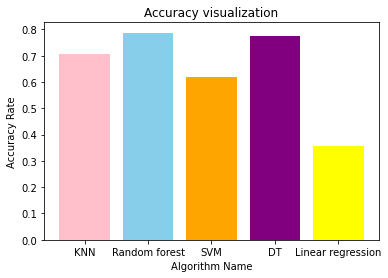

In [ ]:
Accu_x=["KNN","Random forest","SVM","DT","Linear regression"]
Accu_y=[KNN_score,RF_score,SVM_score,DT_score,reg_score]
c=["pink","skyblue","orange","purple","yellow"]
plt.bar(Accu_x,Accu_y,color=c)
plt.xlabel("Algorithm Name")
plt.ylabel("Accuracy Rate")
plt.title("Accuracy visualization")
plt.show()